In [132]:
#Data understanding, preparation and EDA
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing StatsModel Library for model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Import SciKi to perform Splitting & Scaling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#Misc libraries required while running
import datetime
from scipy.stats import pearsonr

In [133]:
#1.Data Sourcing
## Importing CSV Data from file
data_file_path = os.path.join(os.path.split(os.getcwd())[0], 'day', 'D:/LinearRegression/bikeSharing/day.csv')
bike_data = pd.read_csv(data_file_path, index_col='instant')
#Display data shape
data_shape = bike_data.shape
data_shape


(730, 15)

In [134]:
#Check the dataframe information
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [135]:
#Observations:
#No null value found
#Dataset has 730 rows and 15 columns.
#One column(dteday is Object datatype), all other are either float or integer type.
#Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
#We will look and confirm whether to convert them to categorical or treat as integer.
#Using Describe - helps to look at data values
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [136]:
# Displaying percentage of missing values in each column
round(100*(bike_data.isnull().sum()/len(bike_data)), 2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [137]:
# Displaying row-wise null count percentage
round((bike_data.isnull().sum(axis=1)/len(bike_data))*100,2).sort_values(ascending=False)

instant
1      0.0
480    0.0
482    0.0
483    0.0
484    0.0
      ... 
246    0.0
247    0.0
248    0.0
249    0.0
730    0.0
Length: 730, dtype: float64

In [138]:
#Observation
#Based on null checks ,there are no missing / Null values either in columns or rows

In [139]:
#Checking for duplicates & dropping if any found
bike_dup = bike_data.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [140]:
bike_dup.shape

(730, 15)

In [141]:
bike_data.shape

(730, 15)

In [142]:
#Observation
#The shape for duplicate dataframe is same as the original dataframe.
#So we can confirm that there were zero duplicate values in the dataset.

In [152]:
#Data Preparation
#Defining set of fucntions which can be useful to plot graph / charts
def bar_graph_plot_function(bike_data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=bike_data.index, y=bike_data.values)
    label_deviation_above_y_axis = bike_data.max() * 0.015
    for index, value in enumerate(bike_data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [144]:
#Date field 
bike_data.dteday.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

In [145]:
#Checking if any of the date range is outside certain limit
bike_data['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [146]:
#Checking if any of the month range is outside certain limit
bike_data['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [147]:
#Checking if any of the year range is outside certain limit
bike_data['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [148]:
#Observation
#All the range of date, month & year are in the valid range, so we can proceed ahead with this column without
#dropping / changing any records
#So, we will extract only the date part from this column and use it.
#A- Plot graph Date vs Ride Count
bike_data['dteday'] = bike_data['dteday'].apply(lambda x: int(x.split('-')[0]))

In [149]:
#Also, we will rename the column from 'dteday' to 'date'
bike_data = bike_data.rename(columns={"dteday": "date"})
bike_data.describe

<bound method NDFrame.describe of          date  season  yr  mnth  holiday  weekday  workingday  weathersit  \
instant                                                                     
1           1       1   0     1        0        6           0           2   
2           2       1   0     1        0        0           0           2   
3           3       1   0     1        0        1           1           1   
4           4       1   0     1        0        2           1           1   
5           5       1   0     1        0        3           1           1   
...       ...     ...  ..   ...      ...      ...         ...         ...   
726        27       1   1    12        0        4           1           2   
727        28       1   1    12        0        5           1           2   
728        29       1   1    12        0        6           0           2   
729        30       1   1    12        0        0           0           1   
730        31       1   1    12        0  

In [150]:
#2.Data preparation using EDA
#Let's plot distrubution of Ride Count Mean Across all the days
date_dist = round(bike_data.groupby(by='date').cnt.mean()/1000, 2)


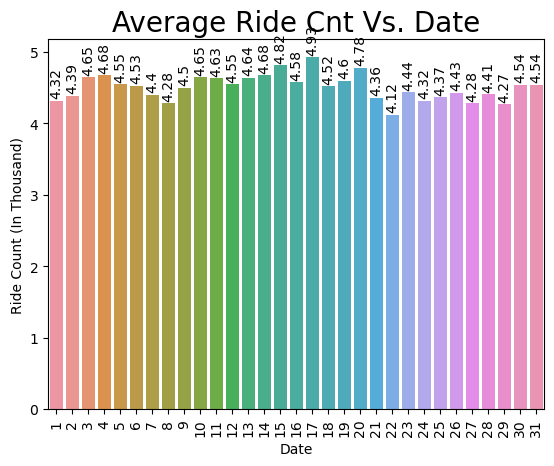

In [158]:
bar_graph_plot_function(bike_data=date_dist, graph_title='Average Ride Cnt Vs. Date', x_axis_label='Date',
                        y_axis_label='Ride Count (In Thousand)', data_label='vertical', x_label_rotation=90)

In [ ]:
#Observation - In above,column name = date was reflected in x axis & Ride count in y-axis
#Based on graph, we don't have any significant impact of this on Ride Count

In [157]:
#Plot graph - Convert season to categorical variable
#Plot graph - between seasons and ride count
bike_data.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [ ]:
#Season column is varied between 1 to 4 so we can proceed ahead with this column without dropping / changing any records
#Season column is categorical column with each value corresponding to specific season.
#We need to map these numbers to seasons, so that these column values will be treated as  Categorical Nominal Type Data
#1: spring,2: summer ,3: fall ,4: winter

In [159]:
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

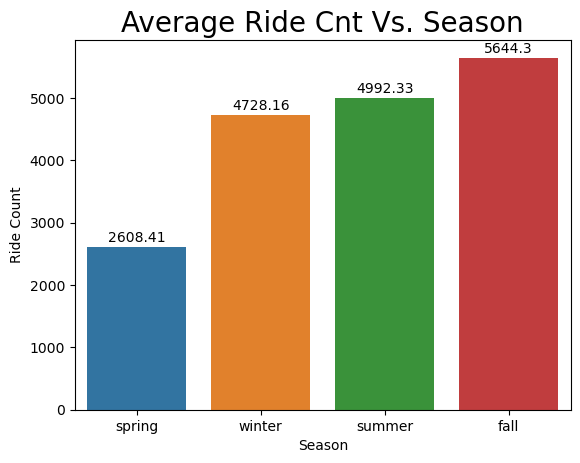

In [161]:
#plot graph - Average Ride Count Mean Across all the Seasons
season_dist = bike_data.groupby(by='season').cnt.mean().sort_values()
bar_graph_plot_function(bike_data=season_dist, graph_title='Average Ride Cnt Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

In [ ]:
#Observation - Different season have different range of ride count distributed across

In [162]:
#Plot graph - Average Ride count Vs Year
bike_data.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

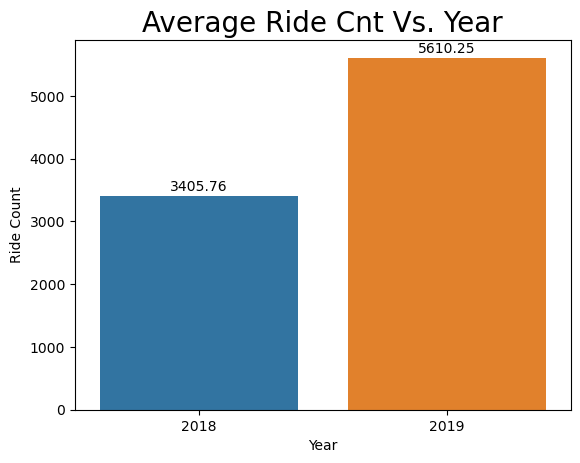

In [163]:
#Year column is varied between 0 and 1 so we can proceed ahead with this column
#Year column consist of 2 values with 0 corresponding to 2018 & 1 corresponding to 2019.
#Let's plot distrubution of Ride Count Mean Year-Wise
year_dist = bike_data.groupby(by='yr').cnt.mean()
bar_graph_plot_function(bike_data=year_dist, graph_title='Average Ride Cnt Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

In [ ]:
#Observation - Based on graph, Ride Count has increases comparatively in 2019 as compared to 2018.

In [164]:
#Plot graph - Month vs Average ride count
bike_data.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

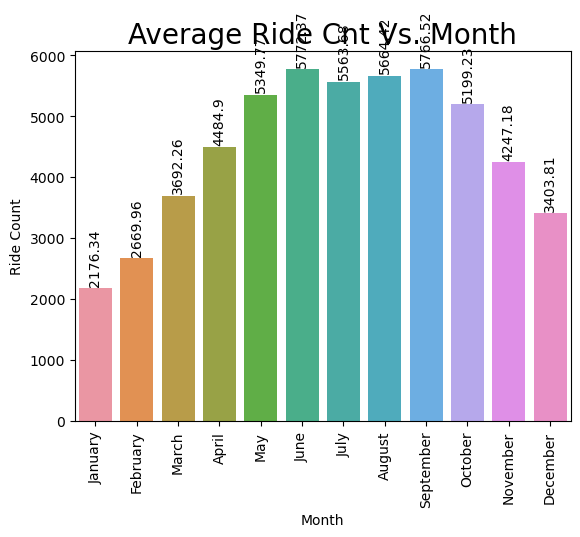

In [167]:
#Month column is varied between 1 (Jan) and 12 (Dec)
#Let's plot distrubution of Ride Count Mean Across all the months
month_dist = bike_data.groupby(by='mnth').cnt.mean()
bar_graph_plot_function(bike_data=month_dist, graph_title='Average Ride Cnt Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='vertical', x_label_rotation=90, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])


In [ ]:
#Observation
#Number of Ride Count drastically increases between April(summer) to October (fall)
#Month column is categorical column with each value corresponding to specific month.


In [168]:
#Plot graph - Holiday vs Ride count
bike_data.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

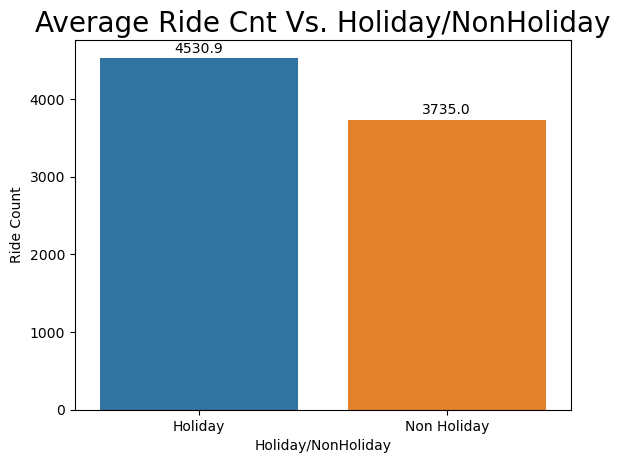

In [169]:
#Holiday column is varied between 0 and 1 
#Let's plot distrubution of Ride Count Vs either as holidays or working day
holiday_dist = bike_data.groupby(by='holiday').cnt.mean()
bar_graph_plot_function(bike_data=holiday_dist, graph_title='Average Ride Cnt Vs. Holiday/NonHoliday', x_axis_label='Holiday/NonHoliday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Non Holiday'])

In [ ]:
#Holiday is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively

In [170]:
#Plot graph to analyze for weekdays vs Ride count
bike_data.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [171]:
#Weekday column is varied between 1 and 6 so proceed ahead with this column
bike_data.groupby(by='weekday').weekday.count()

weekday
0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64

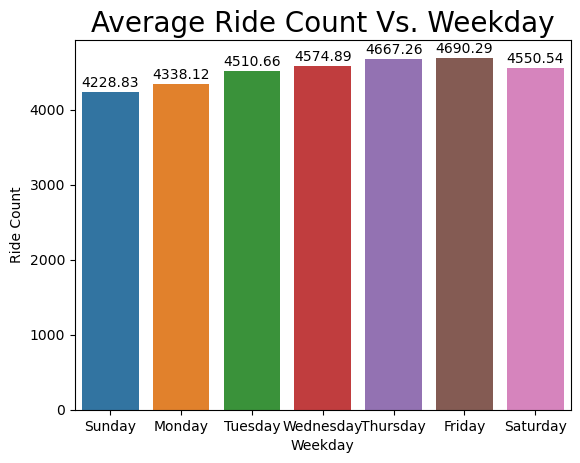

In [172]:
weekday_dist = bike_data.groupby(by='weekday').cnt.mean()
bar_graph_plot_function(bike_data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [ ]:
#As per graph, we plotted the days from Sunday to Saturday is marked as "1" for values of 1, 2, 3, 4, 5 in "Week day"
For this weekday column, Sunday is mapped to 0 till Saturday is mapped to 6

In [173]:
#Plot graph for working day vs Average Ride count
bike_data.workingday.describe()

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

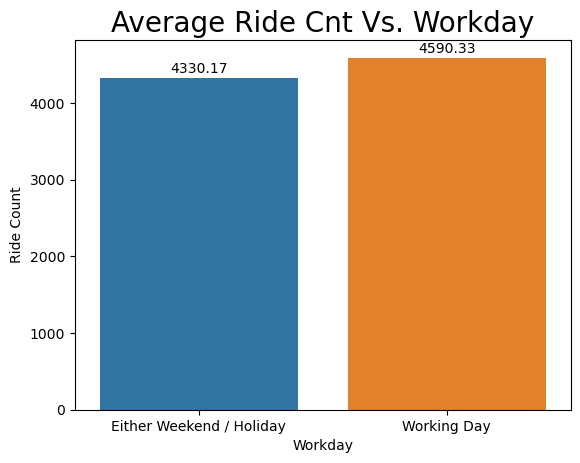

In [174]:
#Working Day is a Categorical Nomimal Variable with two values mapped to "1" & "0" respectively.
#Let's plot distrubution of Ride Count Mean  Vs working days/not
workingday_dist = bike_data.groupby(by='workingday').cnt.mean()
bar_graph_plot_function(bike_data=workingday_dist, graph_title='Average Ride Cnt Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Either Weekend / Holiday', 'Working Day'])

In [175]:
#Plot graph - Weather situation Vs Average Ride count
bike_data.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [ ]:
#Observation - Weather Situation is varied between 1 to 3 so we can proceed ahead with this column

In [176]:
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

In [177]:
#Based on Weather Situation is a Categorical Nomimal Variable and its mapped as follow
#1 -> Clear, Few clouds, Partly cloudy, Partly cloudy
#2 -> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3 -> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4 -> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#As per the available data, we will map each number with below values
#1 -> clear ,2 ->  mist, 3 -> light
bike_data['weathersit'] = bike_data.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [ ]:
#Create a copy of the  dataframe, without the 'instant' column, 

#This will have unique values, and check on value count of it.

bike_dummy=bike_data.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

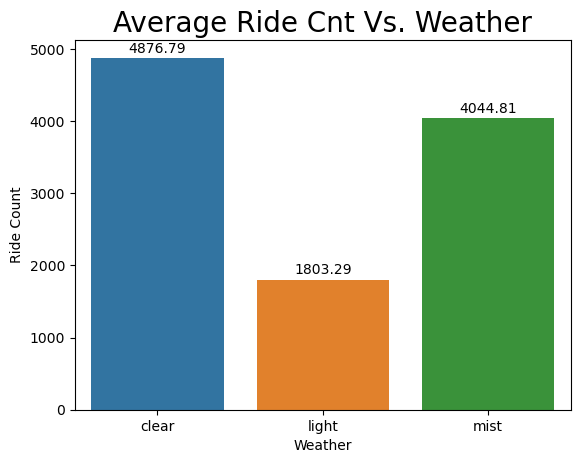

In [178]:
weathersit_dist = bike_data.groupby(by='weathersit').cnt.mean()
bar_graph_plot_function(bike_data=weathersit_dist, graph_title='Average Ride Cnt Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

In [ ]:
#Observation - There seems to be no Junk/Unknown values in the entire dataset.

In [179]:
#Temperate & Adjusted Temperature
#High correlation that appears between Temperature & Adjusted Temperature
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(raw_data['temp'], raw_data["atemp"]), index=headers, columns=headers)

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


In [180]:
#We will go ahead and drop "Adjusted Temperature" column as highly correlated.
bike_data = bike_data.drop(columns=['atemp'])
bike_data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 0, 'Temperature')

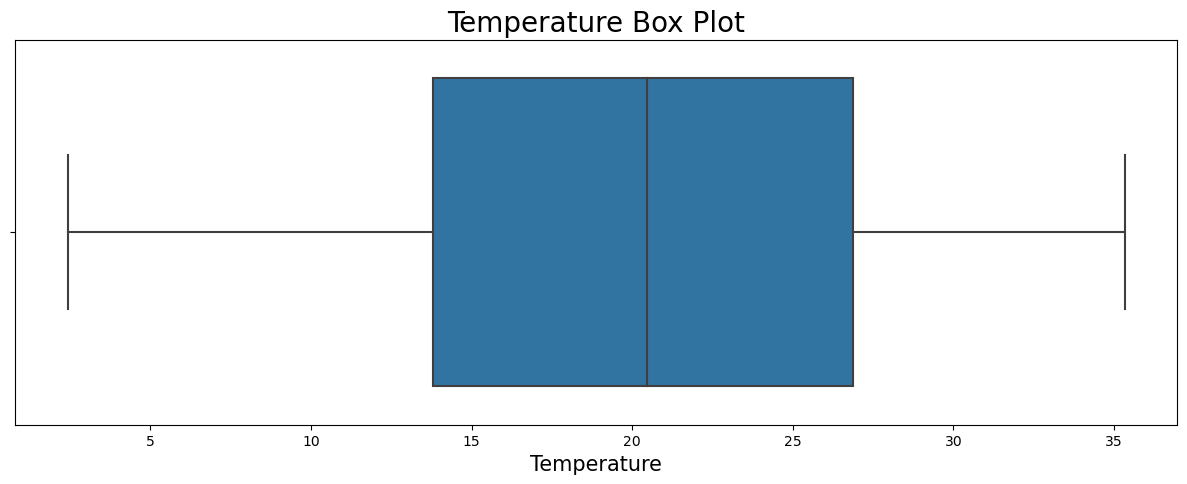

In [182]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

In [ ]:
#Observation - Temperature column is varied between a range(valid)

In [183]:
#Plot graph - Humidity Column Vs Average Ride count
bike_data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Humidity')

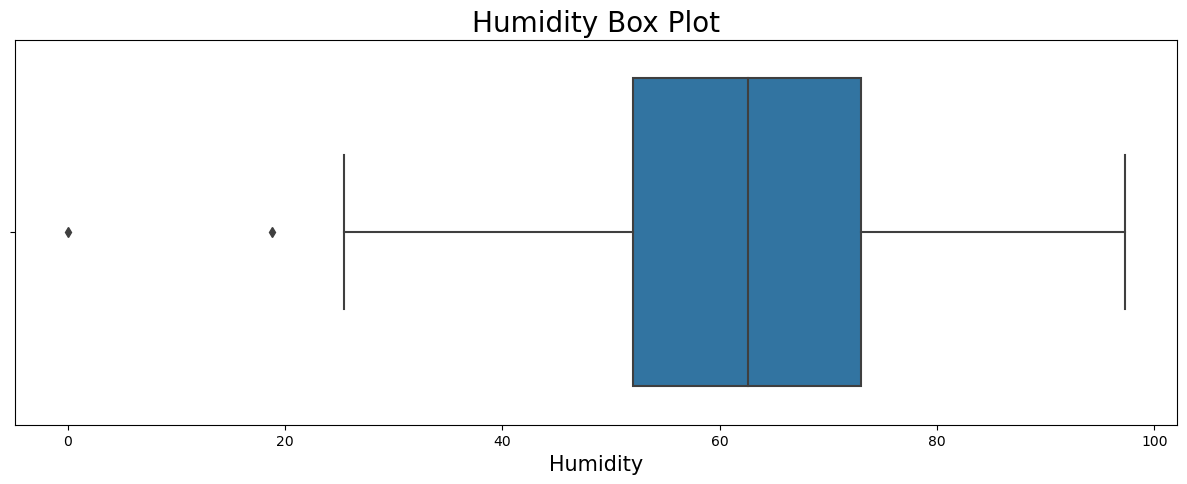

In [184]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [185]:
bike_data[bike_data['hum'] == 0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
69,10,spring,0,3,0,4,1,light,15.952731,0.0,17.545759,46,577,623


In [ ]:
#Observation - To check if this a typo or invalid data from source,
#pick 20% of values prior to specific date & 20% of values after the specific date and generate a plot to check the behaviour

In [195]:
humidity_check_df = bike_data[(bike_data.index > int(69*0.8)) & (bike_data.index < int(69*1.2))]
humidity_check_df
mean_value = humidity_check_df.hum.mean()
mean_value

58.64794230769231

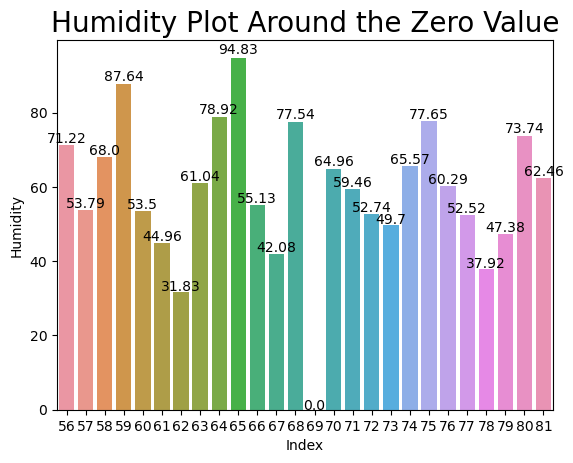

In [189]:
graph = sns.barplot(y=humidity_check_df.hum, x=humidity_check_df.index)
plt.title('Humidity Plot Around the Zero Value', fontdict={'fontsize': 20})
plt.xlabel('Index', fontdict={'fontsize': 10})
plt.ylabel('Humidity', fontdict={'fontsize': 10})
counter = 0
for index, row in humidity_check_df.iterrows():
    graph.text(counter, row.hum*1.01, round(row.hum, 2), color='black', ha="center")
    counter+=1
plt.show()

In [ ]:
#Above graph , the value of humidity as 0 should be practically impossible.
#This could have been possible during recording the data if not done properly.
#This can be done by taking numerical mean of all the records
#before and after this value upto a specifc range
#So, we have adjusted the zero (or missing) value of Humidity successfully.

In [190]:
#Field - Windspeed column
bike_data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [ ]:
#Casual, Registered Count & Total Count
#To predict the final count of specific columns so we didnt require these columns so dropping these.
bike_data = bike_data.drop(columns=['casual', 'registered'])
#So dropping the redundant columns 

In [193]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 74.1+ KB


In [196]:
#pair plot
pair_plot_data = pd.read_csv(data_file_path, index_col='instant')
pair_plot_data['dteday'] = pair_plot_data['dteday'].apply(lambda x: int(x.split('-')[0]))
pair_plot_data = pair_plot_data.rename(columns={"dteday": "date"})
pair_plot_data['yr'] = pair_plot_data['yr'].map({0: 2018, 1:2019})
pair_plot_data = pair_plot_data.drop(columns=['atemp', 'casual', 'registered'])
pair_plot_data.at[int(pair_plot_data[pair_plot_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value
pair_plot_data.head(10)

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,1,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,2,1,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,3,1,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,4,1,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,5,1,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600
6,6,1,2018,1,0,4,1,1,8.378268,51.8261,6.000868,1606
7,7,1,2018,1,0,5,1,2,8.057402,49.8696,11.304642,1510
8,8,1,2018,1,0,6,0,2,6.765000,53.5833,17.875868,959
9,9,1,2018,1,0,0,0,1,5.671653,43.4167,24.250650,822


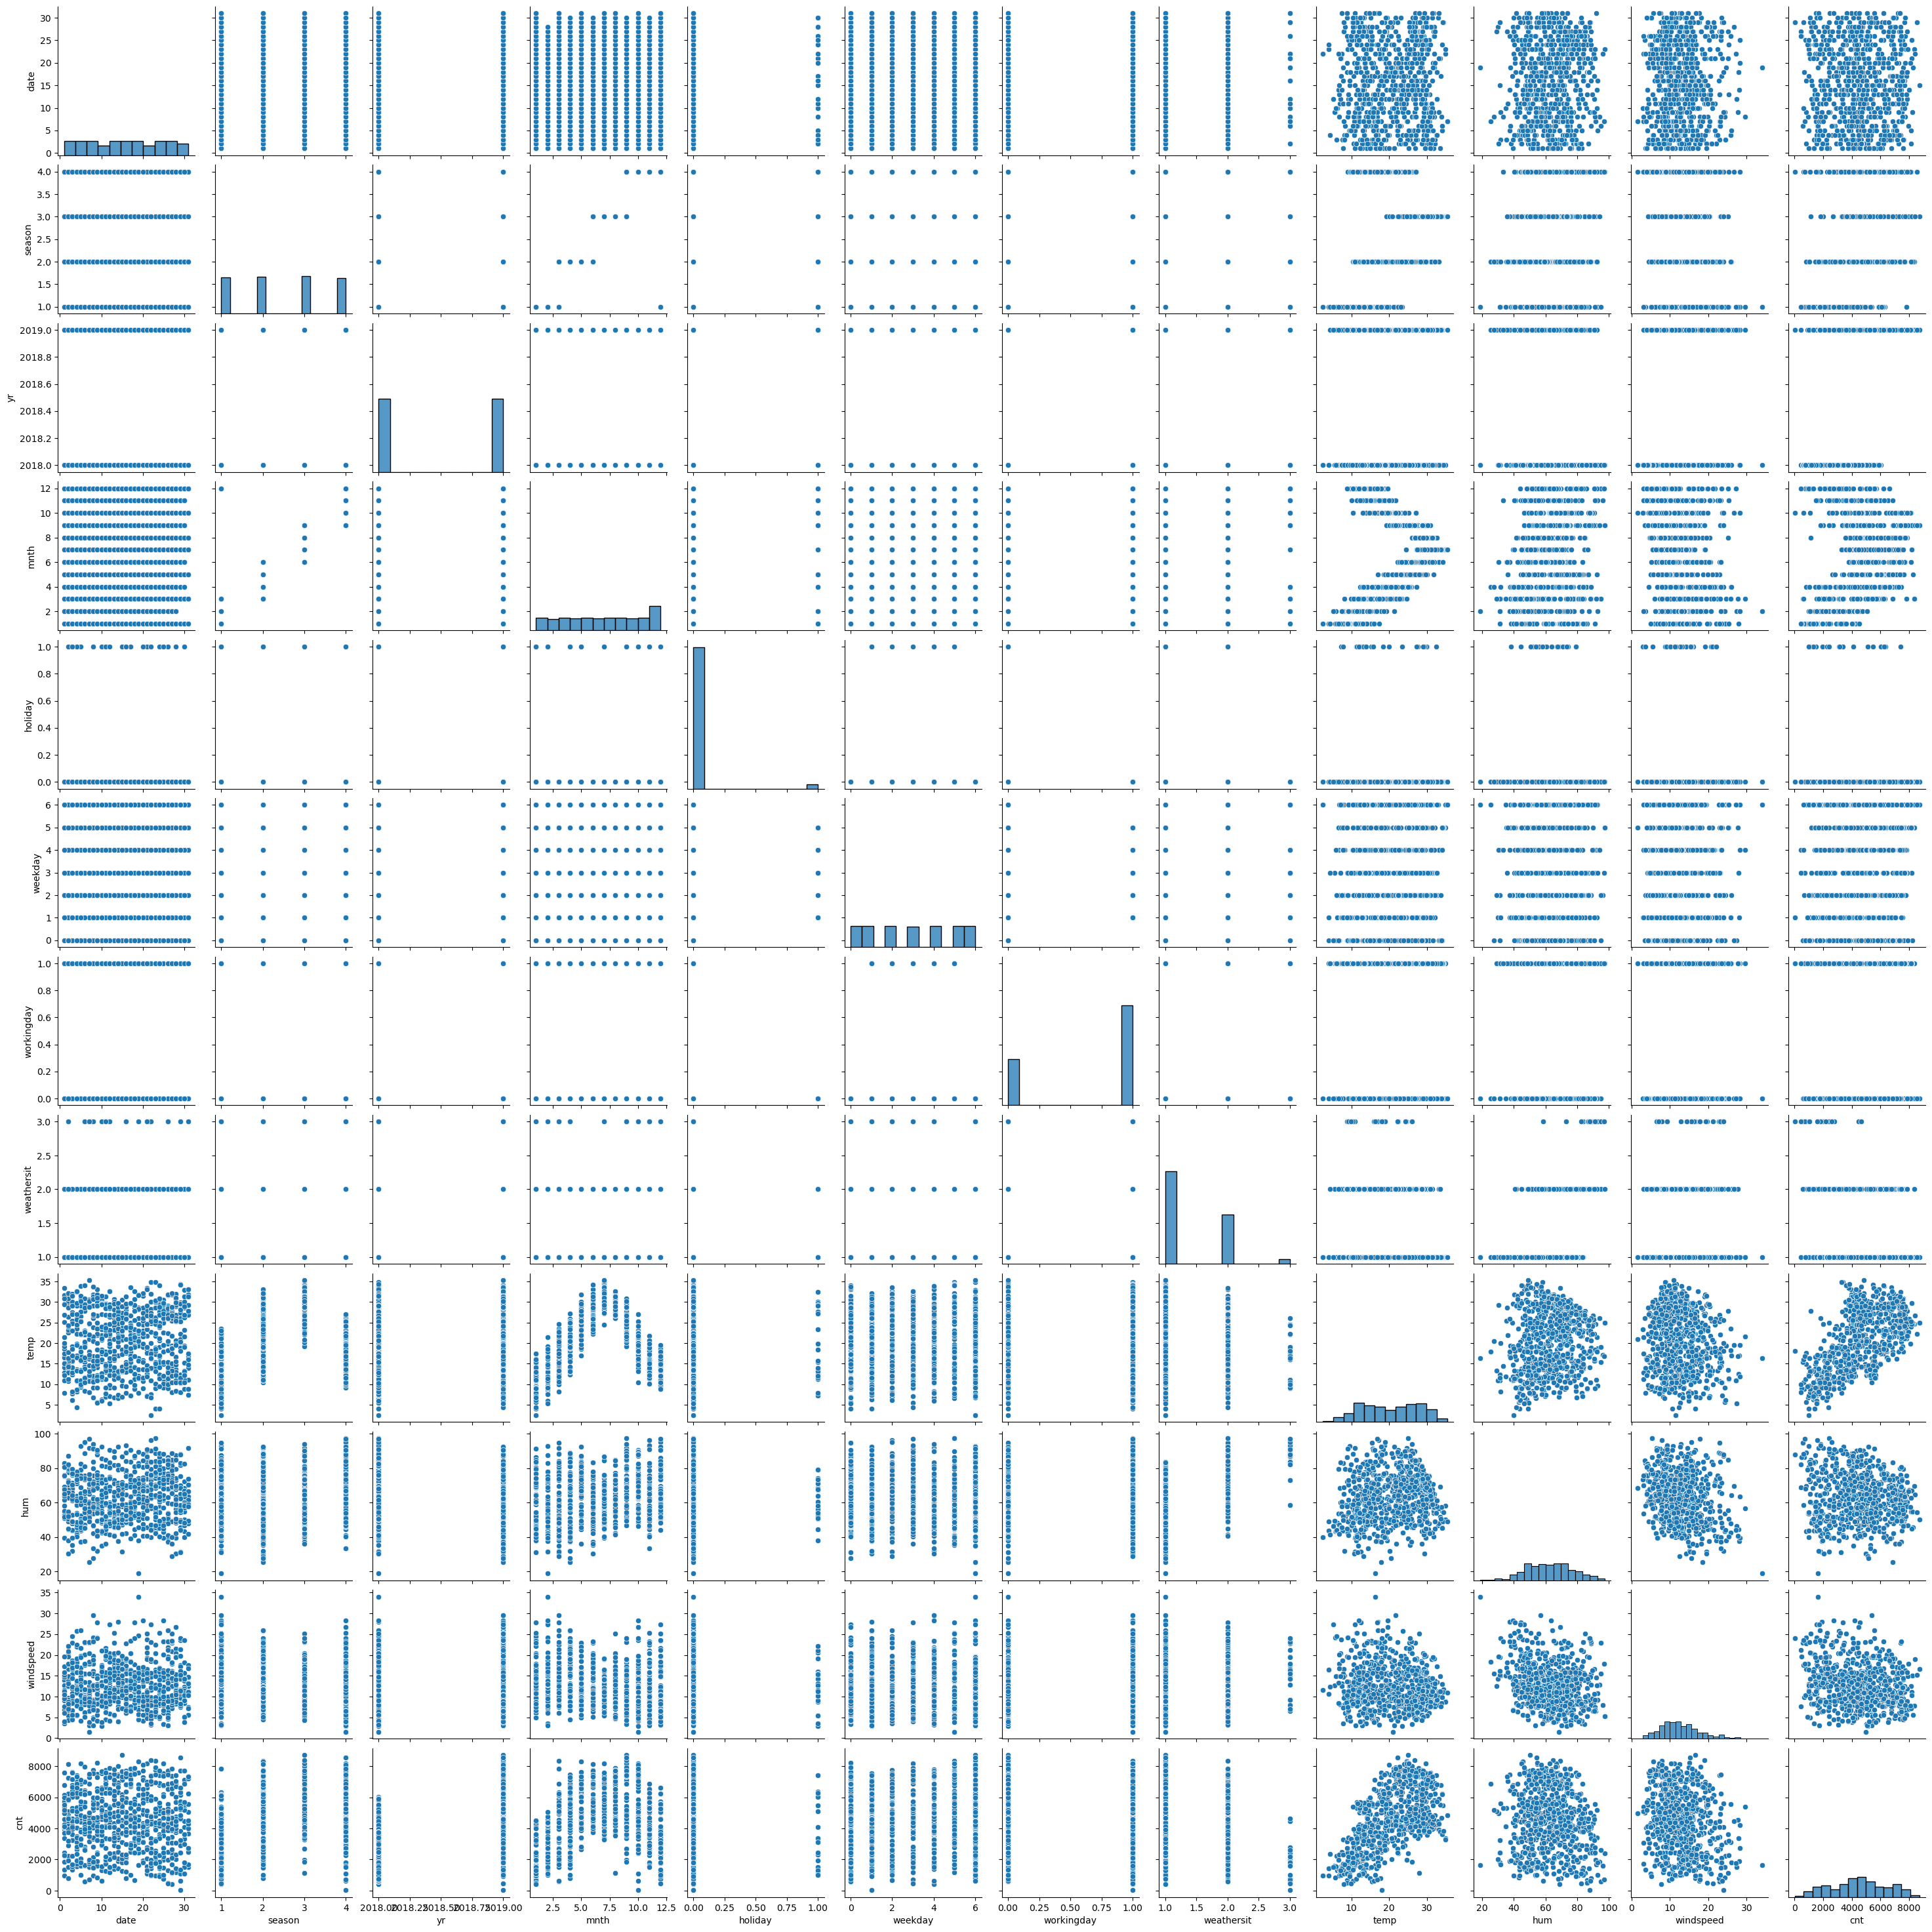

In [199]:
sns.pairplot(pair_plot_data)

In [ ]:
#Following are the few assumptions 
#Ride Count has increased drastically in 2019 as compared to 2018
#Ride Count seems to increase between April to October which are comparatively Fall(Autumn) & Summer Season in US
#Ride Count is lesser on Holidays as compared to other days.
#Date Column seems to be scattered evenly across all the points.
#Ride Count Seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.
#Working Day / Non-Working Day shows almost similar behaviour (after just visualising the data)
#Ride Count is more on Clear & Misty Days as compared to Light Snow / Rainfall
#Ride Count seems to be very much lienarly dependent on Temperature
#Humidity & windspeed does not indicate any specific behaviour  just visualising the data.

In [200]:
#4.Data Transformation (Using One Hot Encoder Method)
#Following Columns are Categorical Nominal Variables (i.e. Creating Dummy Variables):
#Month,Season,Weekday,Weather Situation
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit']
status = pd.get_dummies(bike_data[dummy_variables_columns], drop_first=True)
status.head(10)

,mnth,weekday,season_spring,season_summer,season_winter,weathersit_light,weathersit_mist
instant,,,,,,,
1,1,6,1,0,0,0,1
2,1,0,1,0,0,0,1
3,1,1,1,0,0,0,0
4,1,2,1,0,0,0,0
5,1,3,1,0,0,0,0
6,1,4,1,0,0,0,0
7,1,5,1,0,0,0,1
8,1,6,1,0,0,0,1
9,1,0,1,0,0,0,0


In [201]:
bike_data = pd.concat([bike_data, status], axis=1)
bike_data = bike_data.drop(columns=dummy_variables_columns)

In [202]:
#5.Data Splitting
#Here, we will split the data into 2 parts
#Train Data (On which model will be build and is almost 70% of total data)
#Test Data (On which build model will be tested and is almost 30% of total data)
df_train, df_test = train_test_split(bike_data, train_size=0.7, random_state=100)
df_train.shape

(510, 13)

In [203]:
df_test.shape

(220, 13)

In [204]:
#Data Transformation (Normalising)
#Defining Numerical Variable Columns that should be scaled directly
#Following Columns are Numerical which needs to be Normalised:
#Date,Temperature,Humidity,Windspeed
numerical_variables = ['date', 'temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0
427,0.066667,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1
729,0.966667,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0
483,0.900000,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1
112,0.700000,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1
581,0.100000,1,0,0,0.914852,0.632030,0.462538,0.782559,0,0,0,0,0
501,0.500000,1,0,1,0.719639,0.719193,0.172431,0.851588,0,1,0,0,0
480,0.800000,1,0,1,0.520271,0.440962,0.164434,0.710308,0,1,0,0,0
473,0.566667,1,0,1,0.503656,0.586518,0.270032,0.499885,0,1,0,0,1


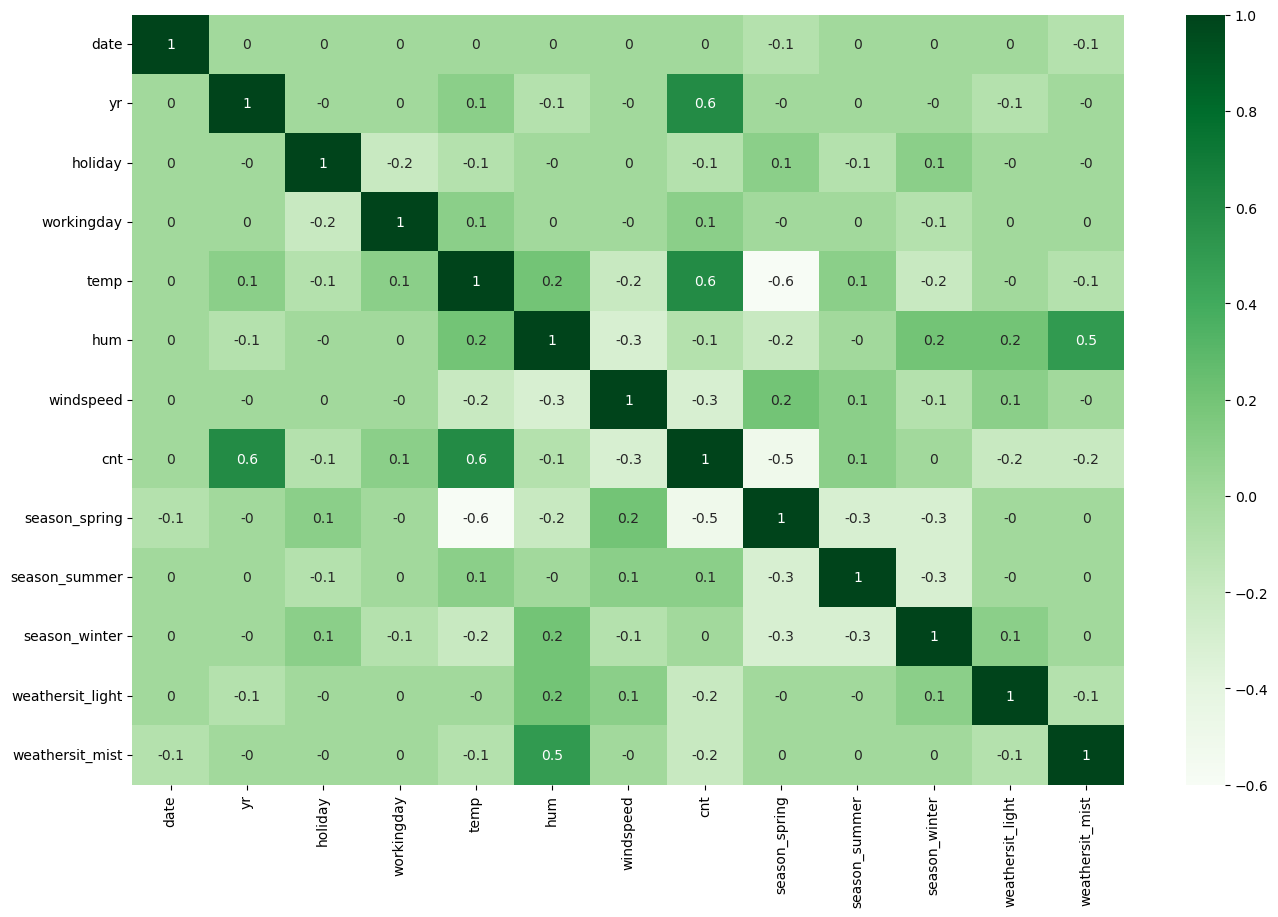

In [205]:
#Manual Analysis of Variable (using Correlaion-Co-efficient)
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

In [ ]:
#Observation - From the above Heatmap, we see that no variable is highly correlated with another variable in any way. 
#So, we can further proceed and check Multi-Collinearity while creating models itself

In [207]:
#Defining Target & Feature Variables for Iterative Modelling Process
#Fixing Trained Target Variable
y_train = df_train.pop('cnt')
#Fixing Trained Feature(s) Variable
X_train = df_train

In [208]:
#6.Iterative Modeling Process
#Currently, we have almost 30 Predictors to Predict our outcome. Analysing all of these predictors.
#To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)
#Creating a generalised function for evaluating Variance Inflation Factor
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [209]:
#RFE (Recursive Feature Elimination) Application
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,date,True,1
1,yr,True,1
2,holiday,True,1
3,workingday,True,1
4,temp,True,1
5,hum,True,1
6,windspeed,True,1
7,season_spring,True,1
8,season_summer,True,1
9,season_winter,True,1


In [ ]:
#Observation - RFE method has successfully evaluated top 12 predictors which will impact our outcome.
#But, we will not rely on this enitirely and continue validating these 12 features manually
#by building model one by one and elimating any feature which does not satisfy our requirements

In [210]:
#Model Building Process - 1
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.76e-181
Time:                        21:02:38   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2847      0.037      7.775      0.000       0.213       0.357
date                -0.0089      0.014     -0.627      0.531      -0.037       0.019
yr                   0.2304      0.008     27.179      0.000       0.214       0.247
holiday             -0.0743      0.027     -2.720      0.007      -0.128      -0.021
workingday           0.0176      0.009      1.910      0.057      -0.001       0.036
temp                 0.4941      0.035     14.276      0.000       0.426       0.562
hum                 -0.1382      0.039     -3.528      0.000      -0.215      -0.061
windspeed           -0.1803      0.027     -6.705      0.000      -0.233      -0.127
season_spring       -0.0753      0.021     -3.630      0.000      -0.116      -0.035
season_summer        0.0427      0.014      3.074      0.002       0.015       0.070
season_winter        0.0877      0.017      5.154      0.000       0.054       0.121
weathersit_light    -0.2418      0.028     -8.791      0.000      -0.296      -0.188
weathersit_mist     -0.0537      0.011     -4.881      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       57.860   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.732
Skew:                          -0.553   Prob(JB):                     3.40e-35
Kurtosis:                       5.499   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Observation 
#In the above model we see that P-Value of "Holiday" feature is more than 0.05, which make its co-efficient insignificant.
#So, we will proceed ahead with dropping this feature and designing model again.

In [211]:
#Model Building Process - 2
#Dropping Holiday feature and designing model again
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          7.13e-181
Time:                        21:04:40   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     498   BIC:                            -893.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2792      0.037      7.588      0.000       0.207       0.352
date                -0.0091      0.014     -0.640      0.522      -0.037       0.019
yr                   0.2305      0.009     27.018      0.000       0.214       0.247
workingday           0.0232      0.009      2.570      0.010       0.005       0.041
temp                 0.4952      0.035     14.219      0.000       0.427       0.564
hum                 -0.1392      0.039     -3.531      0.000      -0.217      -0.062
windspeed           -0.1809      0.027     -6.687      0.000      -0.234      -0.128
season_spring       -0.0763      0.021     -3.653      0.000      -0.117      -0.035
season_summer        0.0435      0.014      3.108      0.002       0.016       0.071
season_winter        0.0867      0.017      5.061      0.000       0.053       0.120
weathersit_light    -0.2392      0.028     -8.645      0.000      -0.294      -0.185
weathersit_mist     -0.0527      0.011     -4.761      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       63.054   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.715
Skew:                          -0.574   Prob(JB):                     6.37e-42
Kurtosis:                       5.758   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Observation - From the above observations,p-values of all features are under control. VIF table
#In the VIF table, Humidity will again drop this humidity feature and design our model.

In [213]:
#Model Building Process - 3
#Drop Humidity feature and designing model again
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.2
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.12e-179
Time:                        21:12:19   Log-Likelihood:                 477.94
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     499   BIC:                            -887.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2104      0.032      6.665      0.000       0.148       0.272
date                -0.0124      0.014     -0.864      0.388      -0.041       0.016
yr                   0.2338      0.009     27.273      0.000       0.217       0.251
workingday           0.0237      0.009      2.595      0.010       0.006       0.042
temp                 0.4656      0.034     13.619      0.000       0.398       0.533
windspeed           -0.1527      0.026     -5.840      0.000      -0.204      -0.101
season_spring       -0.0843      0.021     -4.014      0.000      -0.125      -0.043
season_summer        0.0385      0.014      2.735      0.006       0.011       0.066
season_winter        0.0742      0.017      4.378      0.000       0.041       0.108
weathersit_light    -0.2777      0.026    -10.800      0.000      -0.328      -0.227
weathersit_mist     -0.0754      0.009     -8.280      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       60.200   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.961
Skew:                          -0.556   Prob(JB):                     6.17e-39
Kurtosis:                       5.654   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.24
1,windspeed,4.63
2,date,3.51
3,workingday,3.03
4,season_spring,2.21
5,yr,2.07
6,season_summer,1.88
7,season_winter,1.77
8,weathersit_mist,1.54
9,weathersit_light,1.08


In [ ]:
#Observation - From the above observations, p-values of all features are under control. So we will proceed ahead to VIF table
#VIF table - We will drop Working Day column feature and design our model again

In [215]:
#Model Building Process - 4
#Dropping Working Day feature and designing model again
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.64e-179
Time:                        10:17:25   Log-Likelihood:                 474.52
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     500   BIC:                            -886.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2254      0.031      7.225      0.000       0.164       0.287
date                -0.0112      0.014     -0.773      0.440      -0.040       0.017
yr                   0.2345      0.009     27.201      0.000       0.218       0.251
temp                 0.4672      0.034     13.590      0.000       0.400       0.535
windspeed           -0.1555      0.026     -5.918      0.000      -0.207      -0.104
season_spring       -0.0848      0.021     -4.017      0.000      -0.126      -0.043
season_summer        0.0389      0.014      2.752      0.006       0.011       0.067
season_winter        0.0726      0.017      4.259      0.000       0.039       0.106
weathersit_light    -0.2750      0.026    -10.642      0.000      -0.326      -0.224
weathersit_mist     -0.0741      0.009     -8.107      0.000      -0.092      -0.056
==============================================================================
Omnibus:                       67.662   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.455
Skew:                          -0.664   Prob(JB):                     2.93e-39
Kurtosis:                       5.566   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,4.63
1,temp,4.51
2,date,3.49
3,season_spring,2.10
4,yr,2.07
5,season_summer,1.84
6,season_winter,1.73
7,weathersit_mist,1.53
8,weathersit_light,1.08


In [ ]:
#Observation
#From the Model Summary Report we can say that all the p-values of respective features are well under control
#Note:Hurestic approach -if VIF value of any predictor is between 5 & 10, 
#it is recommended to scrutinize such variable from business perspective & drop such feature if VIF is greater than 10
#We see that all the features under VIF table are well under control, so we can fix the features available for our model

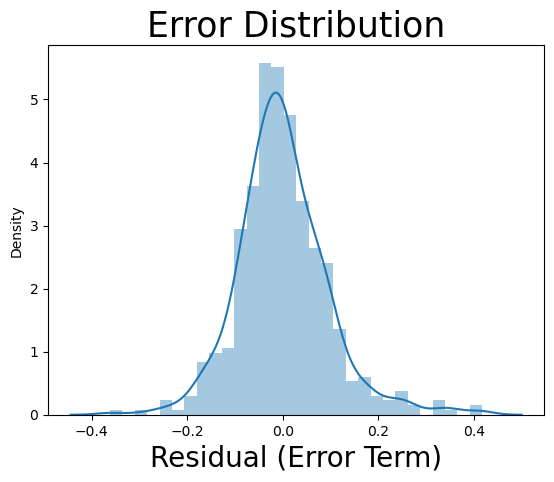

In [217]:
#7.Proof for Linear Regrssion Assumptions
# Assumption of Normally Distributed Error Terms
#After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

In [ ]:
#Observation - Error Distribution Is Normallly Distributed Across 0, which indicates that our model 
#has handled the assumption of Error Normal Distribution properly.

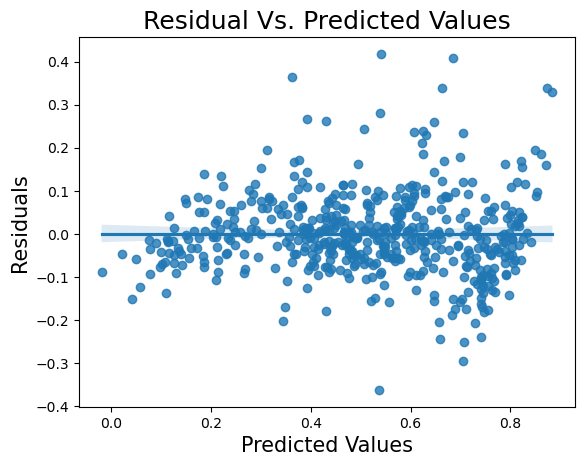

In [219]:
#Assumption of Error Terms Being Independent
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 18})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [220]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 2.7755575615628914e-16


In [ ]:
#Observation - Based on graph, there was no relation between Residual & Predicted Value.
#This convey that the model have no specific pattern.

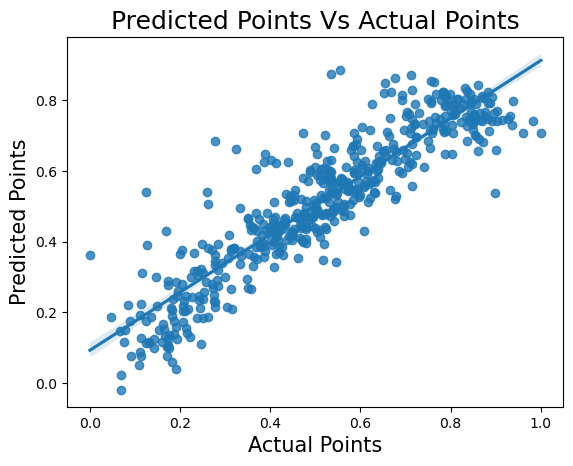

In [221]:
#Homoscedasticity
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs Actual Points', fontdict={'fontsize': 18})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [ ]:
#Observations
# Above graph, we can say that residuals are equal distributed across predicted value.
# Equal variance and dont observe high concentration of data points  & low concentration in certain regions.
# Thus proves Homoscedasticity of Error Terms

In [222]:
#Multicorrelation
#This asumption is already taken care of while building model by calculating VIF of evry predictor. Following is the final VIF value of all the predictors used in the model
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,4.63
1,temp,4.51
2,date,3.49
3,season_spring,2.10
4,yr,2.07
5,season_summer,1.84
6,season_winter,1.73
7,weathersit_mist,1.53
8,weathersit_light,1.08


In [223]:
#Evaluating Correlation Co-efficients of Predictors Impacting Target Variable (Individually)
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.65
yr,0.59
season_spring,-0.55
windspeed,-0.25
weathersit_light,-0.23
weathersit_mist,-0.17
season_summer,0.14
season_winter,0.03
date,0.02


In [224]:
#Predicting on Test Data
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1
536,0.633333,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0
300,0.866667,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1
222,0.300000,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0
153,0.033333,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0
405,0.266667,1,0,1,0.256524,0.579218,0.326196,0.438104,1,0,0,0,0
199,0.566667,0,0,1,0.856704,0.671103,0.372990,0.510354,0,0,0,0,0
172,0.666667,0,0,1,0.774672,0.793903,0.276724,0.553728,0,0,0,0,1
513,0.900000,1,1,0,0.814131,0.696865,0.331536,0.692706,0,1,0,0,0


In [226]:
#Fixing Test Target Variable
y_test = df_test.pop('cnt')

In [227]:
#Fixing Test Feature(s) Variable
X_test = df_test

In [228]:
#Filtering Test Input (& Reserving Required Features Only)
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [229]:
#8.1 Predicting Test Data Using Developed Model
y_test_pred = lr_model.predict(X_test_new)

corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [ ]:
#Observation - Above graph shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

In [231]:
#8.2 Generating R-Square
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7993531399535265

In [ ]:
#Observation - On analysing data,the linear regression model was able to predict bike demand
#precisely with an R2 Score of more than 79.9%